<a href="https://colab.research.google.com/github/matildapedretti-beep/Text-Media/blob/main/INFOMTMA_week_3_exercises_solutions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **Text & Media Analytics**

# Seminar 3 Lab Part I

This is the Google Colab notebook accompanying the seventh seminar of the Applied Data Science Text and Media Analytics course at Utrecht University, the 2025/2026 edition.

We will look into:

* A) Basics: working with images
* B) Object detection with YOLO and Faster R-CNN


---

### Prepare packages required for today's lab
---
We do not have to use GPU today.

In [ ]:
import requests
import cv2
from io import BytesIO
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from PIL import Image

import torch
import torchvision
from torchvision import datasets
import torchvision.transforms as transforms

---
# A: Basics_image as data
---

---
###  Images as data?

---
Images can be visualized as stacked matrices of pixel intensity values, which determine the appearance of the final image. As shown in the example below, a grayscale image is represented as a two-dimensional array (matrix) of pixels, where each pixel corresponds to a single point in the image.

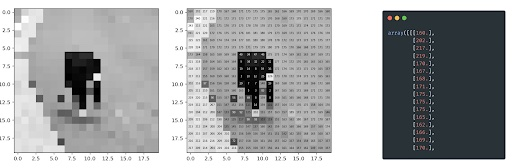








The grayscale image example above consists of 1 channel, while color images in RGB format have three channels: red, green, and blue. (If you import a .png format image, you may see 4 channels, with the last one determining the image's opacity.)



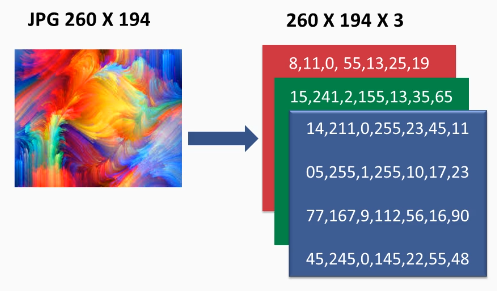

In the example below, we use PIL package's Image() function to read in an image from the web or from a local path.

We then covert the image into numpy arrays

 You can find all images used in the lab in the weekly exercise folder on Teams

In [ ]:
#from a local path - find the jpg file in Brightspace (BrightSpace -> Content -> Lecture slides and materials)
image_path = "/content/triceratops.jpg" #AI generated
img = np.array(Image.open(image_path))

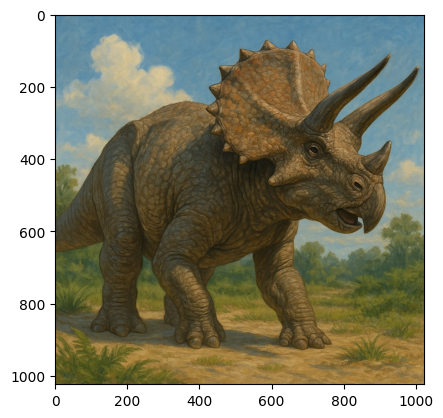

In [ ]:
showimg = plt.imshow(img)
plt.show()

As discussed in the lecture, images in RGB format can be presented in array of intensity values with 3 color channels: red, green and blue.  

In [ ]:
type(img)

numpy.ndarray

In [ ]:
print(img.shape)

(1024, 1024, 3)


The values shown above correspond to the height, width, and channels. With this information, we can manipulate the image to display only the blue/red/green channels.

Note: Channels in a RGB image are typically indexed as 0 for red, 1 for green, and 2 for blue.

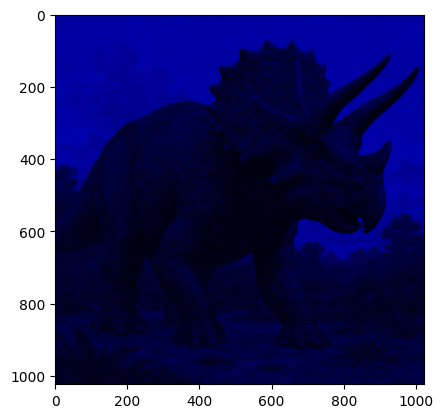

In [ ]:
#keep only blue channel
blue_img = img.copy()
blue_img [:, :, [0, 1]] = 0

plt.imshow(blue_img)
plt.show()

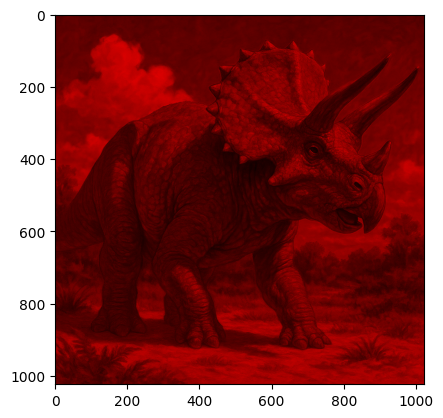

In [ ]:
#keep only red channel

red_img = img.copy()
red_img [:, :, [2, 1]] = 0

plt.imshow(red_img)
plt.show()

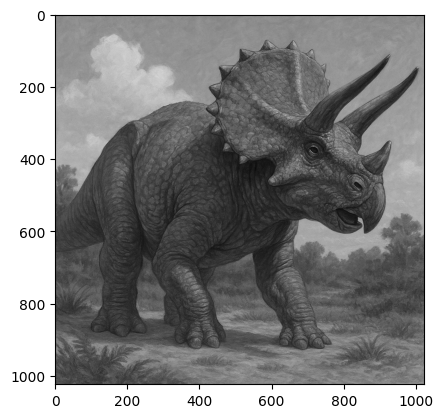

In [ ]:
# Convert to grayscale
img_gray = np.mean(img, axis=2)
plt.imshow(img_gray,cmap='gray')
plt.show()


In [ ]:
img_gray.shape #the dimension has now changed to two

(1024, 1024)

With information provided in the image axes, we can also crop the image. The example below shows how we can crop the picture to only show parts of the iamge. The example below demonstrates how to crop the photo so only the tail of the triceratops is shown.

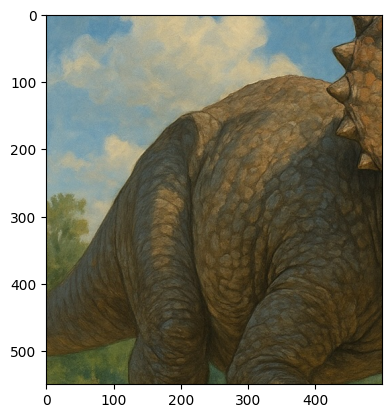

In [ ]:
#crop the image to show only the head
tail = img[150:700,0:500,:]
plt.imshow(tail)
plt.show()

*  150:700 represents the vertical range of rows you want to select.
*  0:500 represents the horizontal range of columns you want to select.

*  : at the end (after the comma) means that you want to select all color channels (RGB channels) in the image.

## Exercise A.1)

```
(a) Upload the image 't_rex.jgp' to the environment - but you can use any image that you like!
(b) Convert it to  a NumPy array, and assign it to the variable img, and inspect its shape
(c) Display the image
```

In [ ]:
#Upload the image 't_rex.jgp' (also BrightSpace -> Content -> Lecture slides and materials) to the environment, convert it to  a NumPy array,
image_path = "/content/t_rex.jpg"
img = np.array(Image.open(image_path))

In [ ]:
#Inspect its shape
print(img.shape)

(1024, 1024, 3)


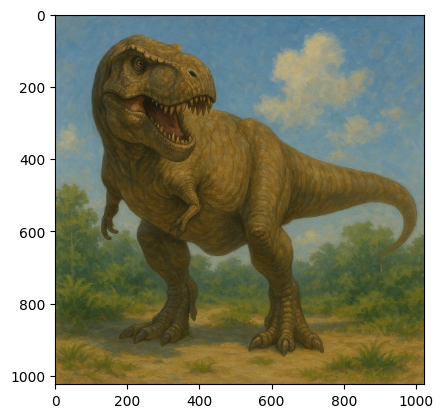

In [ ]:
#Display the image
showcat=plt.imshow(img)
plt.show()


## Exercise A.2)
```
(a) Crop the image to only show the teeth of the T-Rex
(b) Modify the image by only keeping the green channel
(c) Modify the image by removing the blue channel
```

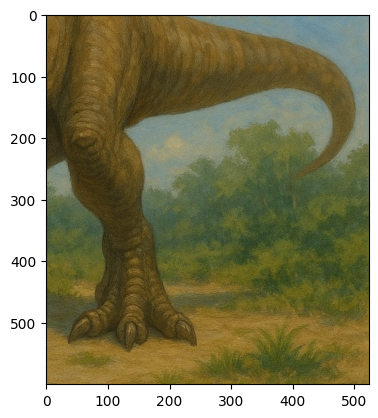

In [ ]:
#crop the image to show only the tail
face = img[400:1000,500:1100,:]
plt.imshow(face)
plt.show()


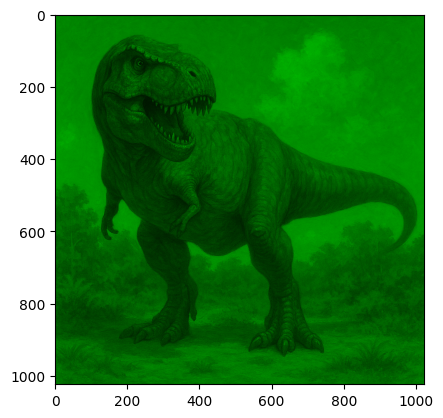

In [ ]:
#Modify the image by only keeping the green channel
#Set the red and blue channels to zero
#keep only green channel
green_img = img.copy()
green_img [:, :, [0, 2]] = 0

plt.imshow(green_img)
plt.show()

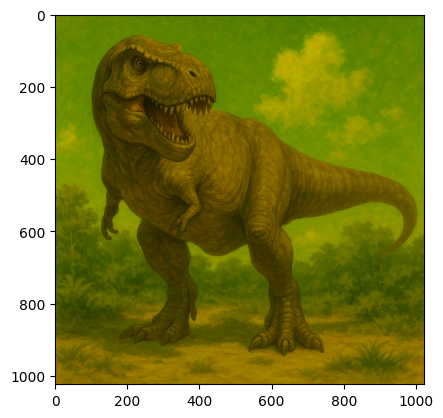

In [ ]:
#Modify the image by removing the blue channel
no_blue_img = img.copy()
no_blue_img[:,:,2] = 0
plt.imshow(no_blue_img)
plt.show()

---
# B: Try object detection
---

## **<h1> B1) Object detection with Faster R-CNN </h1>**


<a href='https://doi.org/10.48550/arXiv.1506.01497'>Faster R-CNN</a> is a model that predicts both bounding boxes and class scores for potential objects in the image  pre-trained on <a href="https://cocodataset.org/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkCV0101ENCoursera872-2023-01-01">COCO<a>.

Faster R-CNN incorporates a Region Proposal Network (RPN) into the model, improving both speed and accuracy in object detection tasks. It efficiently generates region proposals for potential objects in an image and then predicts their class labels and bounding box coordinates. This integration simplifies the object detection process and has become one of the standard approaches in the field.

Please refer to the following paper for more details about Faster R-CNN


Ren, S., He, K., Girshick, R., & Sun, J. (2015). Faster r-cnn: Towards real-time object detection with region proposal networks. Advances in neural information processing systems, 28.


----

In the exercises below, we will


*   Load the pre-trained Faster R-CNN
*   Conduct object detection
*   Conduct object localization
*   Try the moel with your own images



----


## Load Pre-trained Faster R-CNN


In [ ]:
model= torchvision.models.detection.fasterrcnn_resnet50_fpn(pretrained=True)
model.eval()

for name, param in model.named_parameters():
    param.requires_grad = False

/usr/local/lib/python3.12/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=FasterRCNN_ResNet50_FPN_Weights.COCO_V1`. You can also use `weights=FasterRCNN_ResNet50_FPN_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Downloading: "https://download.pytorch.org/models/fasterrcnn_resnet50_fpn_coco-258fb6c6.pth" to /root/.cache/torch/hub/checkpoints/fasterrcnn_resnet50_fpn_coco-258fb6c6.pth


100%|██████████| 160M/160M [00:01<00:00, 157MB/s]


The code loads a pretrained Faster R-CNN model with a ResNet-50 backbone and sets it to evaluation mode for inference. It freezes all model parameters, preventing them from being updated during training, which is useful for inference or transfer learning with a fixed feature extractor.

As mentioned above the model is pre-trained on <a href="https://cocodataset.org/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkCV0101ENCoursera872-2023-01-01">COCO<a>.

Now we import the object labels used in COCO, as we will need them to find the object names associated with the predicted class (numerical) labels. Notice that the list includes 'N/A' because the authors removed a few categories in later papers.


In [ ]:
COCO_INSTANCE_CATEGORY_NAMES = [
    '__background__', 'person', 'bicycle', 'car', 'motorcycle', 'airplane', 'bus',
    'train', 'truck', 'boat', 'traffic light', 'fire hydrant', 'N/A', 'stop sign',
    'parking meter', 'bench', 'bird', 'cat', 'dog', 'horse', 'sheep', 'cow',
    'elephant', 'bear', 'zebra', 'giraffe', 'N/A', 'backpack', 'umbrella', 'N/A', 'N/A',
    'handbag', 'tie', 'suitcase', 'frisbee', 'skis', 'snowboard', 'sports ball',
    'kite', 'baseball bat', 'baseball glove', 'skateboard', 'surfboard', 'tennis racket',
    'bottle', 'N/A', 'wine glass', 'cup', 'fork', 'knife', 'spoon', 'bowl',
    'banana', 'apple', 'sandwich', 'orange', 'broccoli', 'carrot', 'hot dog', 'pizza',
    'donut', 'cake', 'chair', 'couch', 'potted plant', 'bed', 'N/A', 'dining table',
    'N/A', 'N/A', 'toilet', 'N/A', 'tv', 'laptop', 'mouse', 'remote', 'keyboard', 'cell phone',
    'microwave', 'oven', 'toaster', 'sink', 'refrigerator', 'N/A', 'book',
    'clock', 'vase', 'scissors', 'teddy bear', 'hair drier', 'toothbrush'
]
len(COCO_INSTANCE_CATEGORY_NAMES)

91

Load image

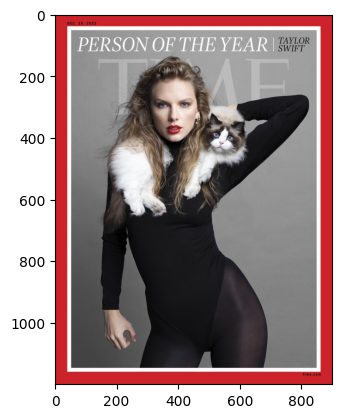

In [ ]:
#Option one: from web
img_url = "https://pbs.twimg.com/media/GAqmNrWWIAANHG1?format=jpg"
image = Image.open(requests.get(img_url, stream=True).raw)
plt.imshow(np.array(image))
plt.show()

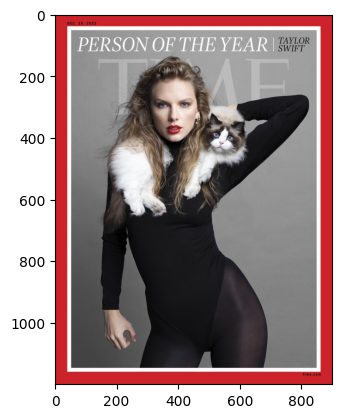

In [ ]:
#Option two: from your local path
img_path='/content/img_ts.jpeg'
image = Image.open(img_path)
plt.imshow(image)
plt.show()

In the examples provided earlier, we demonstrated how to manipulate images as NumPy arrays. For this exercise, we will convert an image into a PyTorch tensor.

Tensors are multi-dimensional arrays similar to NumPy arrays but designed specifically for deep learning tasks. In the upcoming exercises, you will work with tensors and leverage the PyTorch library to implement deep learning models.

In [ ]:
transform = transforms.Compose([transforms.ToTensor()])
img = transform(image)

Try using the plt.imshow() function to display the image.

TypeError: Invalid shape (3, 1200, 900) for image data

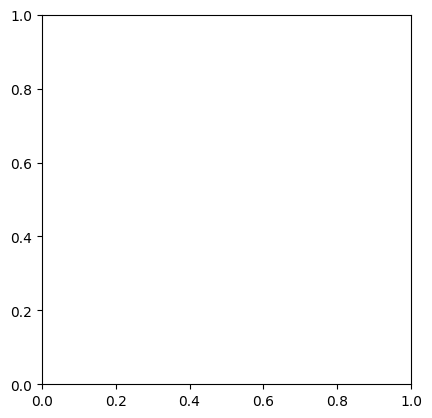

In [ ]:
#NOTE: Error is expected/on purpose!
plt.imshow(img)
plt.show()

The code does not work with the tensor. Why?
Be aware that in PyTorch, images are typically represented in a 'channel-first' format, where the dimensions of the tensor are ordered as (channels, height, width). However, in the earlier examples, our images were in a 'channel-last' format. The .permute(1, 2, 0) operation below reorders the dimensions of the tensor to match the 'channel-last' format.

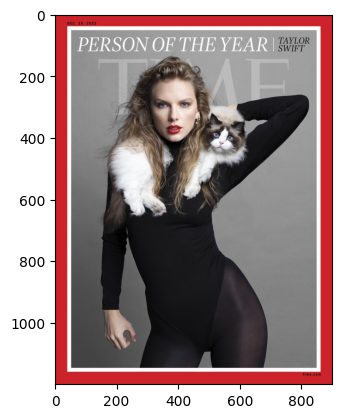

In [ ]:
plt.imshow(img .permute(1, 2, 0))
plt.show()

Now make the prediction with the model() function.

In [ ]:
pred = model([img])

In [ ]:
#Check out what is in the prediction result
pred

[{'boxes': tensor([[ 133.1898,  119.6191,  711.0847, 1142.4568],
          [ 189.4946,  224.6105,  616.2791,  662.1724],
          [ 355.4497,  300.3465,  617.3826,  615.9988],
          [ 171.4055,  146.3514,  582.6724,  702.2725],
          [ 431.2957,  282.1284,  738.9810,  613.0228],
          [ 246.2442,  248.2315,  801.4926,  660.6823],
          [ 480.1926,  304.3185,  622.2422,  506.8916],
          [ 125.4105,  184.8021,  734.2598,  864.6841],
          [  83.2602,  137.8550,  849.3031,  900.6211],
          [ 395.7766,  263.4515,  816.7850,  643.8113],
          [  57.2811,  190.0298,  857.9654,  930.2989],
          [ 155.7430,  193.7053,  533.2453,  743.0266],
          [  96.8534,  258.4094,  847.9858,  811.9615],
          [ 314.0451,  225.0022,  749.6680,  629.3837],
          [ 433.7451,  269.8020,  825.6878, 1136.7979],
          [  57.6010,   50.6988,  833.2668,  713.5647]]),
  'labels': tensor([ 1, 17, 17,  1, 17, 63, 17, 17, 62, 62, 63, 18, 15,  1, 62, 72]),
  'scor

As you can see from the above, the output is a dictionary with:
*   the **coordinates of the bounding boxes**  corresponding to different predicted  classes
*   labels of  **predicted classes**
*   the **probability of belonging to that class**


In [ ]:
len(pred[0]['labels'])

16

We have 16 different class predictions, ordered by **likelihood scores** for potential objects.


In [ ]:
pred[0]['labels']



tensor([ 1, 17, 17,  1, 17, 63, 17, 17, 62, 62, 63, 18, 15,  1, 62, 72])

In [ ]:
pred[0]['scores']

tensor([0.9963, 0.8313, 0.6696, 0.4970, 0.3635, 0.3104, 0.2029, 0.1480, 0.1456,
        0.1252, 0.1064, 0.0905, 0.0831, 0.0649, 0.0591, 0.0567])

The class number corresponds to the index in the list of category names. Each class has an associated score. As we can guess, the first class would be 'person,' and the second one would be 'cat.' Let's check if that is the case:

In [ ]:
index=pred[0]['labels'][0].item()
COCO_INSTANCE_CATEGORY_NAMES[index]

'person'

In [ ]:
index=pred[0]['labels'][1].item()
COCO_INSTANCE_CATEGORY_NAMES[index]

'cat'

As we saw from the prediction output, we have information about the bounding boxes. We can try the code below to draw a box on the image:


In [ ]:
#Here we can see the coordinates of the box for the second object (i.e. cat)
pred[0]['boxes'][1].tolist()

[189.49464416503906, 224.61053466796875, 616.2791137695312, 662.1724243164062]

The above numbers are in the order of [t, l, r, b]. The (t, l) coordinates indicate the top-left corner, and the (r, b) coordinates indicate the bottom-right corner of the bounding box. The code below demonstrates how you can use this information to locate the predicted object in the image.

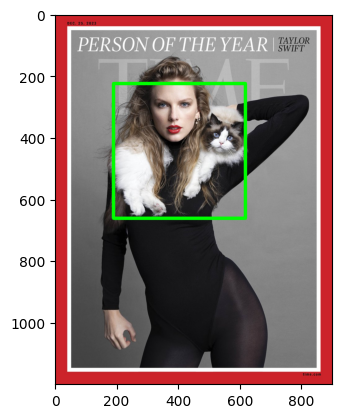

In [ ]:
#Now we draw the box
bounding_box=pred[0]['boxes'][1].tolist()

t,l,r,b=[round(x) for x in bounding_box]

img_plot=(np.clip(cv2.cvtColor(np.clip(img.numpy().transpose((1, 2, 0)),0,1), cv2.COLOR_RGB2BGR),0,1)*255).astype(np.uint8) #the tensor is converted to an open CV array and plot an image with the box:
cv2.rectangle(img_plot,(t,l),(r,b),(0, 255, 0), 10) # Draw Rectangle with the coordinates
plt.imshow(cv2.cvtColor(img_plot, cv2.COLOR_BGR2RGB))
plt.show()
del img_plot, t, l, r, b

Now, after exploring the model, we will create two functions:

* A function that allows us to specify class names for prediction and set the threshold for the confidence score.
* A function to locate or draw bounding boxes around the identified objects.



In [ ]:
def get_predictions(pred,threshold=0.8,objects=None ):

    predicted_classes= [(COCO_INSTANCE_CATEGORY_NAMES[i],p,[(box[0], box[1]), (box[2], box[3])]) for i,p,box in zip(list(pred[0]['labels'].numpy()),pred[0]['scores'].detach().numpy(),list(pred[0]['boxes'].detach().numpy()))]
    predicted_classes=[  stuff  for stuff in predicted_classes  if stuff[1]>threshold ]

    if objects  and predicted_classes :
        predicted_classes=[ (name, p, box) for name, p, box in predicted_classes if name in  objects ]
    return predicted_classes

NOTE: *threshold (default=0.8)* sets a confidence score threshold. Only predictions with scores greater than this value are retained.

In [ ]:
def locate(predicted_classes, image, rect_th=10, text_size=3, text_th=3):
    img = (np.clip(cv2.cvtColor(np.clip(image.numpy().transpose((1, 2, 0)), 0, 1), cv2.COLOR_RGB2BGR), 0, 1) * 255).astype(np.uint8).copy()

    #Define a list of bright colors (green, yellow, blue, red)
    colors = [(0, 255, 0), (255, 255, 0), (0, 0, 255), (255, 0, 0)]

    color_index = 0  #Initialize the color index

    for predicted_class in predicted_classes:
        label, probability, box = predicted_class[0], predicted_class[1], predicted_class[2]
        (t, l), (r, b) = box  #Extract the two corner points of the bounding box
        t, l, r, b = round(t), round(l), round(r), round(b)  # Round the coordinates

        color = colors[color_index]  #Get the current color

        cv2.rectangle(img, (t, l), (r, b), color, rect_th)
        cv2.putText(img, label + ": " + str(round(probability, 2)), (t, l - 10), cv2.FONT_HERSHEY_SIMPLEX, text_size, color, thickness=text_th)

        color_index = (color_index + 1) % len(colors)  #Rotate between colors

    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    del img
    del image


Now we can check if we can detect a dog, cat, or person in the Time Magazine cover. We will also set a threshold of 0.7.

In [ ]:
pred_class=get_predictions(pred,objects=['person','cat','dog'],threshold=0.7)

In [ ]:
pred_class

[('person',
  np.float32(0.9963385),
  [(np.float32(133.18979), np.float32(119.619095)),
   (np.float32(711.08466), np.float32(1142.4568))]),
 ('cat',
  np.float32(0.8313053),
  [(np.float32(189.49464), np.float32(224.61053)),
   (np.float32(616.2791), np.float32(662.1724))])]

Using the *draw_box function*, we can locate the two objects above.

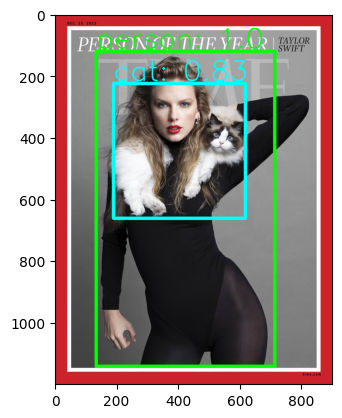

In [ ]:
locate(pred_class,img)

## Excercise B.1)

Now we will work with image file *B1_JW.jpeg* (on BrightSpace).

```
Tasks
- Import and display the image.
- Convert the image into a tensor.
- Identify all objects in the image with a confidence score above 0.8.
- Locate and draw bounding boxes around these objects in the image.
```


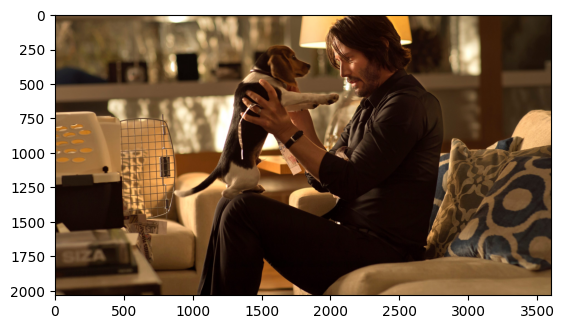

In [ ]:
#Import & shiw the image
img_path='/content/B1_JW.jpeg'
image = Image.open(img_path)
plt.imshow(image)
plt.show()

In [ ]:
#Convert it into a tensor
img = transform(image)
pred = model([img])

In [ ]:
#Make the prediction
pred_thresh=get_predictions(pred,threshold=0.8)
pred_thresh

[('person',
  np.float32(0.9952428),
  [(np.float32(975.42017), np.float32(36.44973)),
   (np.float32(2763.6907), np.float32(1989.4429))]),
 ('dog',
  np.float32(0.89575255),
  [(np.float32(942.8017), np.float32(232.69118)),
   (np.float32(2005.4172), np.float32(1386.7942))]),
 ('tie',
  np.float32(0.8770985),
  [(np.float32(2113.8828), np.float32(658.45435)),
   (np.float32(2300.7322), np.float32(993.21606))])]

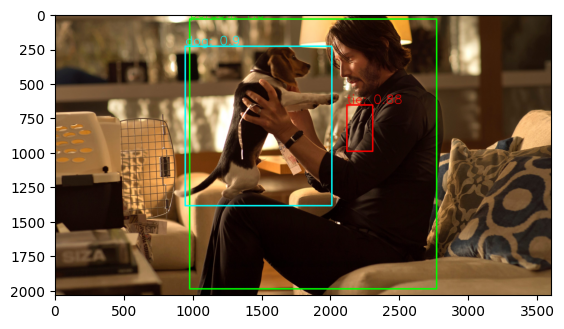

In [ ]:
#Locate the predicted objects
locate(pred_thresh, img)
del pred_thresh

# B2) Object detection with YOLO

YOLO [(You Only Look Once)](https://github.com/ultralytics/yolov5/releases) is another popular object detection algorithm. It is easy to implement for object detection tasks in images, videos (and even for real-time streaming videos).

Please refer to the following paper for more details about YOLO:

*   Redmon, J., Divvala, S., Girshick, R., & Farhadi, A. (2016). You only look once: Unified, real-time object detection. In Proceedings of the IEEE conference on computer vision and pattern recognition (pp. 779-788).

In [ ]:
!pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 27.3 MB/s eta 0:00:00


Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.

image 1/1 /content/B2_JW.jpeg: 384x640 2 persons, 2 dogs, 2 ties, 492.6ms
Speed: 12.4ms preprocess, 492.6ms inference, 15.5ms postprocess per image at shape (1, 3, 384, 640)


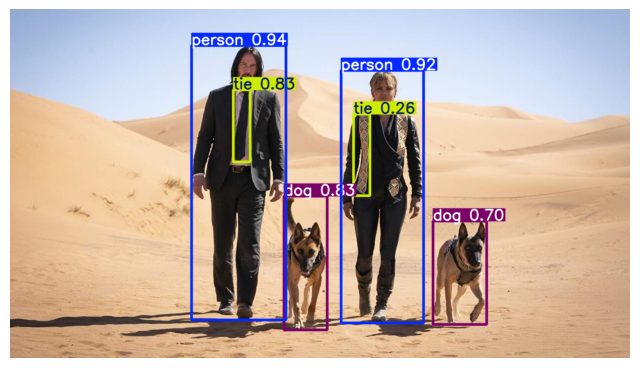

In [ ]:
from ultralytics import YOLO
from PIL import Image
import matplotlib.pyplot as plt

# Load model
model = YOLO('yolov8s.pt')

# Run inference
img_path = '/content/B2_JW.jpeg'
results = model(img_path)

# Take first result
r = results[0]

# Get annotated image as a numpy array (BGR)
im_bgr = r.plot()

# Convert BGR → RGB for matplotlib
im_rgb = im_bgr[:, :, ::-1]

# Show inline
plt.figure(figsize=(8, 6))
plt.imshow(im_rgb)
plt.axis('off')
plt.show()


In [ ]:
import pandas as pd

cols = ['xmin','ymin','xmax','ymax','confidence','class']
df = pd.DataFrame(r.boxes.data.cpu().numpy(), columns=cols)
df['name'] = [model.names[int(c)] for c in df['class']]
print(df)


         xmin        ymin        xmax        ymax  confidence  class    name
0  365.749481   73.516090  555.392090  625.782349    0.938609    0.0  person
1  666.670959  123.791367  832.170288  631.736267    0.919967    0.0  person
2  449.256500  162.227356  483.530365  307.501862    0.833954   27.0     tie
3  551.625427  376.162537  638.622864  645.463745    0.831887   16.0     dog
4  851.978943  426.420502  959.453247  634.328064    0.695420   16.0     dog
5  691.776489  211.032883  724.037415  375.227417    0.255363   27.0     tie


### Excercise B.2)  play with Yolo's other functions

Alternatively, we can use the pre-built script (detect.py) provided by the YOLOv5 repository to perform object detection. It can be directly applied to a folder such as path/videos/YouTube video URL.

Follow the [tutorial ](https://colab.research.google.com/github/ultralytics/yolov5/blob/master/tutorial.ipynb#scrollTo=7mGmQbAO5pQb)

```
Tasks
- detect objects in a YouTube music video of your choice, such as https://www.youtube.com/watch?v=RlPNh_PBZb4.
- Save and inspect the output video showin predicted object.
````